In [374]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import plotly

In [375]:
%matplotlib inline

In [43]:
#defining older functions not needed in this version
def add_layer_1(fig,data_value_counts):
    fig.data[0]['node']['label'] = tuple(list(fig.data[0]['node']['label']) + list(data_value_counts.index))
    fig.data[0]['link']['source'] = tuple(range(1,len(data_value_counts)+1))
    fig.data[0]['link']['target'] = tuple([0]*len(data_value_counts))
    fig.data[0]['link']['value'] = tuple(data_value_counts)
    return fig

def add_layer_2(fig, data_value_counts):
    new_labels = list(fig.data[0]['node']['label']) + list(data_value_counts.index.map(lambda x: x[0]).drop_duplicates())
    new_source = list(fig.data[0]['link']['source'])
    new_target = list(fig.data[0]['link']['target'])
    new_value = list(fig.data[0]['link']['value'])
    for s, t in data_value_counts.index:
        
        new_source.append(get_all_indices(new_labels, s)[-1])#appending source 
        new_target.append(get_all_indices(new_labels, t)[0])#appending target
        new_value.append(data_value_counts[(s,t)])#appending value
    fig.data[0]['node']['label'] = tuple(new_labels)
    fig.data[0]['link']['source'] = tuple(new_source)
    fig.data[0]['link']['target'] = tuple(new_target)
    fig.data[0]['link']['value'] = tuple(new_value)
    #add positions for nodes
    #fig.data[0]['node']['x'] = [0.85] + [0.5]*21 + [0.15]*21
    #fig.data[0]['node']['y'] = [0.5] + list(np.linspace(0.1,0.9,21)) + list(np.linspace(0.1,0.9,21))
    #fig.data[0]['node']['y'] = [0.5,0.05,0.18,0.27] + list(np.linspace(0.3,0.95,18)) + [0.05,0.15,0.23] + list(np.linspace(0.23,0.95,18))
        
    return fig
    
def get_all_indices(listlike, compare_value):
    return [i for i, value in enumerate(listlike) if value == compare_value] 

def sankey_add_layer(fig, data_value_counts):
    #saving lengths of data attributes, nodes and links parameters
    len(fig['data'][0]['node']['label'])
    len(fig['data'][0]['node']['label'])
    len(fig['data'][0]['node']['label'])
    len(fig['data'][0]['node']['label'])
    # adding new labels from, second item 
    new_labels = list(fig.data[0]['node']['label']) + list(data_value_counts.index.map(lambda x: x[0]).drop_duplicates())

In [44]:
# creating a new class from g.Sankey
class Layered_sankey(go.Sankey):
    def add_first_layer(self, data_value_counts): # adds first layer from a value_counts dataframe
        #nodes
        old_labels = list(data_value_counts.index.map(lambda x: x[0]).drop_duplicates())
        updated_labels = list(list(data_value_counts.index.map(lambda x: x[0]).drop_duplicates()) #First Layer, no incoming connections
                          + list(data_value_counts.index.map(lambda x: x[1]).drop_duplicates()) # Second Layer, contains connections from first layer
                         )
        #links
        new_source = [] #getting the sources for links from the first element of indx pair
        new_target = [] #getting the target for links from the second element of indx pair
        new_value = [] #  changed here to avoid duplication
        sum_value = data_value_counts.sum()
        self['node']['label'] = updated_labels
        self['link']['source'] = new_source
        self['link']['target'] = new_target
        self['link']['value'] = new_value
        
        for s, t in data_value_counts.index:
            new_source.append(get_all_indices(old_labels, s)[-1])#appending source 
            new_target.append(get_all_indices(updated_labels, t)[-1])#appending target
            new_value.append(data_value_counts[(s,t)])#appending value
        self['node']['label'] = updated_labels
        self['link']['source'] = new_source
        self['link']['target'] = new_target
        self['link']['value'] = new_value
        self['link']['label'] = tuple(
            map(
                lambda x: str(round(x*100,4)) + ' %', list(data_value_counts/sum_value)
            )
        )

        
 
    
    def add_layer(self,data_value_counts): # adds a layer from value counts dataframe
        #nodes
        old_labels = list(self['node']['label'])
        new_labels = list(data_value_counts.index.map(lambda x: x[1]).drop_duplicates()) # add new layer nodes
        updated_labels = tuple(old_labels + new_labels)
        sum_value = data_value_counts.sum()
        #print (old_labels)
        #print(new_labels)
        #print(updated_labels)
        #links 
        new_source = list(self['link']['source'])
        new_target = list(self['link']['target'])
        new_value = list(self['link']['value'])
        new_label = list(self['link']['label'])
        
        for s, t in data_value_counts.index:
            new_source.append(get_all_indices(old_labels, s)[-1])#appending source 
            new_target.append(get_all_indices(updated_labels, t)[-1])#appending target
            new_value.append(data_value_counts[(s,t)])#appending value
            new_label.append(str(round(100*data_value_counts[(s,t)]/sum_value, 4)) + ' %')#appending label
            
        self['node']['label'] = tuple(updated_labels)
        self['link']['source'] = tuple(new_source)
        self['link']['target'] = tuple(new_target)
        self['link']['value'] = tuple(new_value)
        self['link']['label'] = tuple(new_label)

### New section forward plotting

### Data section for layers

In [45]:
# making layer2 pairs 
selected_df['layer_2_pair'] = selected_df['event_path_list'].map(lambda x: tuple(x[0:2]) if len(x)>=2 else None) 
# corrected code to be 'n>=2'

C:\Users\yati121068\AppData\Local\Continuum\Anaconda3\envs\plotly_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
layer_2_counts = selected_df['layer_2_pair'].value_counts()

### layer 3

In [47]:
def get_layer_data(selected_df = selected_df, n=2): # gets data  as value counts from the given layer from event_path # i.e the counts of n-1th and nth steps
    ser_x = selected_df['event_path_list'].map(lambda x: tuple(x[n-2:n]) if len(x)>=n else None)
    return pd.Series(ser_x).value_counts()

### Creating Figure

In [48]:
#initialise the sankey using basic info
fwd_sankey = Layered_sankey(
    node = dict(
      #pad = 15,
      #thickness = 20,
      #line = dict(color = "black", width = 0.5),
      #label = ["RedZone Purchase"],
      #color = "blue"
    ),
    link = dict(
    color = 'rgba(0,0,150,0.2)' # color of connections
    )
)

In [49]:
# add the first 2 layer
fwd_sankey.add_first_layer(layer_2_counts) 

In [50]:
fwd_sankey.add_layer(get_layer_data(n=3))

In [51]:
fwd_sankey.add_layer(get_layer_data(n=4))

In [52]:
fwd_sankey.add_layer(get_layer_data(n=5))
fwd_sankey.add_layer(get_layer_data(n=6))
fwd_sankey.add_layer(get_layer_data(n=7))


In [53]:
fig = go.Figure(data = fwd_sankey)

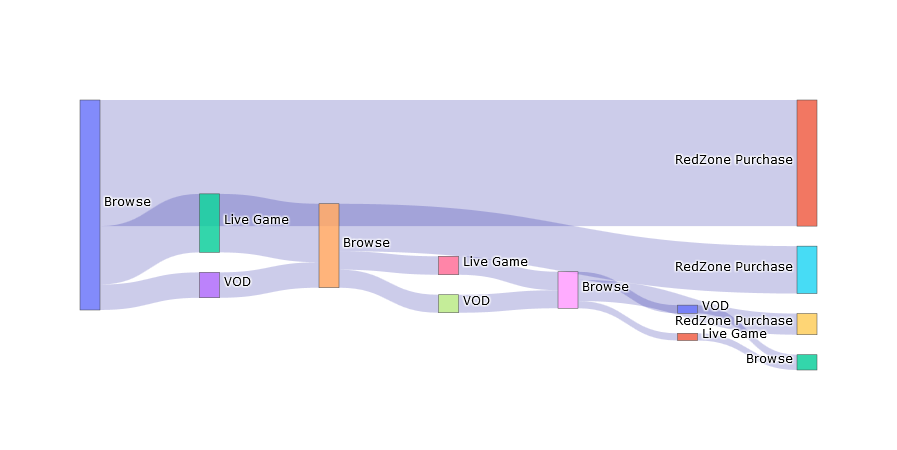

In [54]:
fig.show()